In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
#loading data
data = pd.read_csv("ecomm_customer_data.csv")

In [5]:
#viewing and checking data
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
#Rectifying Missing Data, DataTypes, Values
data['Returns'] = data['Returns'].fillna(0).astype('int64')
data['Purchase Date']=data['Purchase Date'].astype('datetime64[ns]')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  int64         
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [9]:
#Creating Total price feature using Product Price and Quantity
data['Total Price']=data['Quantity']*data['Product Price']
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Total Price
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,31,Female,0,177
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,31,Female,0,522
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,31,Female,0,413
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,31,Female,0,1188
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,31,Female,0,1036


In [10]:
product_distribution = data[['Product Category','Customer ID','Quantity']].drop_duplicates()
product_distribution

,Product Category,Customer ID,Quantity
0,Home,44605,1
1,Electronics,44605,3
2,Books,44605,1
4,Books,44605,4
5,Home,13738,3
...,...,...,...
249995,Home,33807,1
249996,Electronics,20455,1
249997,Electronics,28055,5
249998,Electronics,15023,2


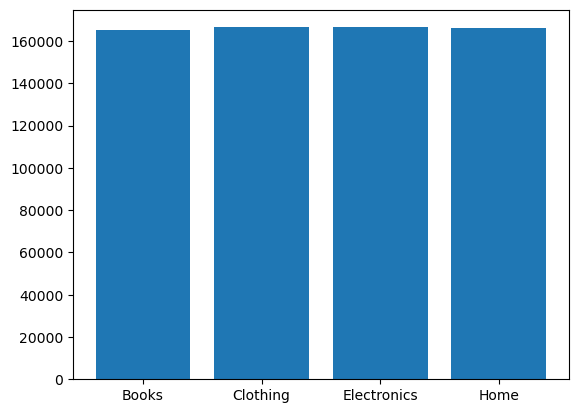

In [11]:
product_dist=product_distribution.groupby('Product Category').agg({'Quantity':'sum'})
product_dist_plt=plt.bar(product_dist.index,product_dist['Quantity'])

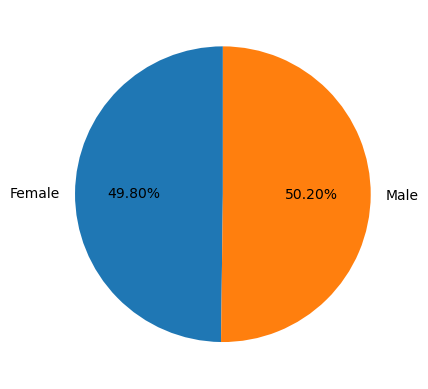

In [12]:
gender_dist = data.groupby('Gender').agg({'Total Price':'sum'})
gender_dist_plt=plt.pie(gender_dist['Total Price'],labels=gender_dist.index,startangle=90,autopct='%1.2f%%')

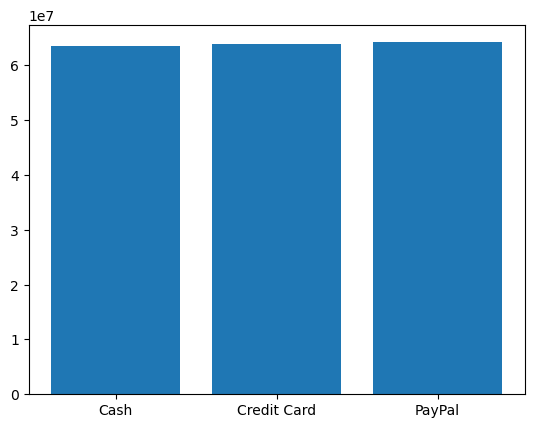

In [13]:
pay_dist=data.groupby('Payment Method').agg({'Total Price':'sum'})
pay_dist_plt=plt.bar(pay_dist.index,pay_dist['Total Price'])

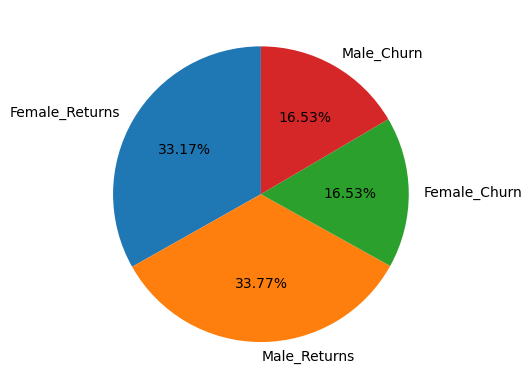

In [14]:
gender_r=data[['Gender','Returns']]
gender_c=data[['Gender','Churn']]
gender_returns=gender_r[gender_r['Returns'] == 1]
gender_churn=gender_c[gender_c['Churn'] == 1]
gender_returns=gender_returns.groupby('Gender').agg({'Returns':'sum'})
gender_churn=gender_churn.groupby('Gender').agg({'Churn':'sum'})
r=gender_returns['Returns'].tolist()
c=gender_churn['Churn'].tolist()
pie_rc=[]
for i in r:
    pie_rc.append(i)
for i in c:
    pie_rc.append(i)
gender_returns_plt = plt.pie(pie_rc,labels=['Female_Returns','Male_Returns','Female_Churn','Male_Churn'],startangle=90,autopct='%1.2f%%')

In [19]:
#RFM
data['Purchase Date'].max()

Timestamp('2023-09-13 18:42:49')

In [23]:
latest_date = dt.datetime(2023, 9, 15)
rfm = data.groupby('Customer ID').agg({'Purchase Date':lambda dt:(latest_date - dt.max()).days, 'Customer ID':lambda n:len(n), 'Total Price': lambda Total:Total.sum()})
rfm

,Purchase Date,Customer ID,Total Price
Customer ID,,,
1,289,3,5600
2,73,6,6459
3,223,4,3613
4,442,5,4339
5,425,5,2263
...,...,...,...
49996,360,7,6107
49997,389,2,1592
49998,14,10,8440


In [24]:
rfm.columns = ['Recency','Frequency','Monetary']
rfm

,Recency,Frequency,Monetary
Customer ID,,,
1,289,3,5600
2,73,6,6459
3,223,4,3613
4,442,5,4339
5,425,5,2263
...,...,...,...
49996,360,7,6107
49997,389,2,1592
49998,14,10,8440


In [28]:
rfm_cond = rfm['Monetary']>0
rfm = rfm[rfm_cond]
rfm

,Recency,Frequency,Monetary
Customer ID,,,
1,289,3,5600
2,73,6,6459
3,223,4,3613
4,442,5,4339
5,425,5,2263
...,...,...,...
49996,360,7,6107
49997,389,2,1592
49998,14,10,8440


In [29]:
rfm.info()
rfm.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 49661 entries, 1 to 50000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    49661 non-null  int64
 1   Frequency  49661 non-null  int64
 2   Monetary   49661 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


,Recency,Frequency,Monetary
count,49661.000000,49661.000000,49661.000000
mean,262.557580,5.034131,3855.916413
std,246.805578,2.199399,2144.105477
min,1.000000,1.000000,11.000000
25%,78.000000,3.000000,2271.000000
50%,188.000000,5.000000,3584.000000
75%,371.000000,6.000000,5154.000000
max,1352.000000,17.000000,17448.000000


In [31]:
rfm['r_qt'] = pd.qcut(rfm['Recency'],5,[5,4,3,2,1])
rfm['f_qt'] = pd.qcut(rfm['Frequency'].rank(method='first'),5,[1,2,3,4,5])
rfm['m_qt'] = pd.qcut(rfm['Monetary'],5,[1,2,3,4,5])
rfm

,Recency,Frequency,Monetary,r_qt,f_qt,m_quartile,m_qt
Customer ID,,,,,,,
1,289,3,5600,2,1,5,5
2,73,6,6459,4,4,5,5
3,223,4,3613,3,2,3,3
4,442,5,4339,1,3,4,4
5,425,5,2263,2,3,2,2
...,...,...,...,...,...,...,...
49996,360,7,6107,2,5,5,5
49997,389,2,1592,2,1,1,1
49998,14,10,8440,5,5,5,5


In [40]:
rfm['RFM Score'] = rfm.r_qt.astype(str) + rfm.f_qt.astype(str) + rfm.m_qt.astype(str)
rfm.to_csv('cust_rfm.csv')
data.to_csv('ecomm_data.csv')

In [38]:
rfm[rfm['RFM Score']=='111'].sort_values('Monetary',ascending=False).head()

,Recency,Frequency,Monetary,r_qt,f_qt,m_quartile,m_qt,RFM Score
Customer ID,,,,,,,,
3278,726,3,1980,1,1,1,1,111
48231,1296,1,1980,1,1,1,1,111
43252,643,2,1980,1,1,1,1,111
33959,765,2,1980,1,1,1,1,111
10431,530,3,1979,1,1,1,1,111
